In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
tweet_df = pd.read_csv('train1.csv')

In [3]:
tweet_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35380 entries, 0 to 35379
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      35380 non-null  int64 
 1   label   35380 non-null  int64 
 2   tweet   35380 non-null  object
dtypes: int64(2), object(1)
memory usage: 829.3+ KB


In [5]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")


 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 

  bihday your majesty 

#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   

 factsguide: society now    #motivation 



In [6]:
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)


In [7]:
tweet_df.tweet = tweet_df['tweet'].apply(data_processing)


In [8]:
tweet_df = tweet_df.drop_duplicates('tweet')
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32618 entries, 0 to 35379
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      32618 non-null  int64 
 1   label   32618 non-null  int64 
 2   tweet   32618 non-null  object
dtypes: int64(2), object(1)
memory usage: 1019.3+ KB


In [9]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet_tokens = word_tokenize(data)
    tweet = [lemmatizer.lemmatize(word,pos='v') for word in tweet_tokens]
    return " ".join(tweet)

In [10]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lemmatizing)
#example
data="the jumping fox"
l_data = lemmatizing(data)
print(l_data)

the jump fox


In [11]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

user father dysfunctional selfish drag kid dysfunction run 

user user thank lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked 

bihday majesty 

model love u take u time ur 

factsguide society motivation 



In [13]:
tweet_df['labels']=tweet_df['label'].map({0:"not hate speech",1:"hate speech"})
tweet_df.head()

,id,label,tweet,labels
0,1,0,user father dysfunctional selfish drag kid dys...,not hate speech
1,2,0,user user thank lyft credit cant use cause don...,not hate speech
2,3,0,bihday majesty,not hate speech
3,4,0,model love u take u time ur,not hate speech
4,5,0,factsguide society motivation,not hate speech


# Data visualization

<Axes: xlabel='labels', ylabel='count'>

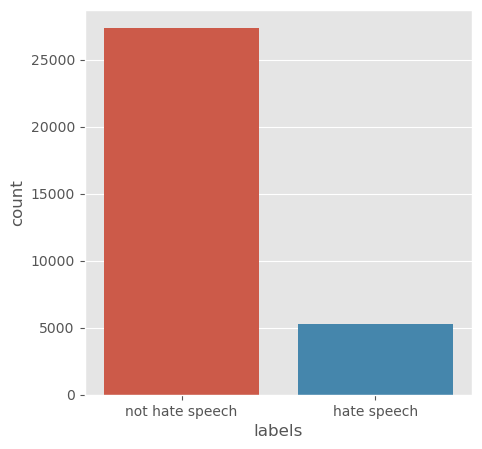

In [14]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='labels', data = tweet_df)

Text(0.5, 1.0, 'Distribution of sentiments')

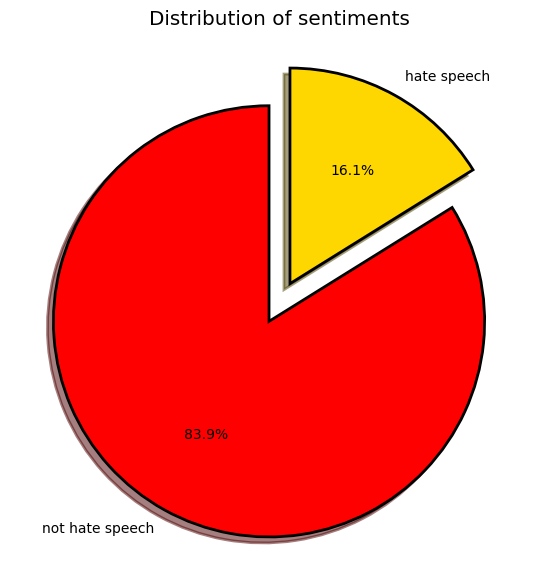

In [15]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['labels'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [16]:
non_hate_tweets = tweet_df[tweet_df.label == 0]
non_hate_tweets.head()

,id,label,tweet,labels
0,1,0,user father dysfunctional selfish drag kid dys...,not hate speech
1,2,0,user user thank lyft credit cant use cause don...,not hate speech
2,3,0,bihday majesty,not hate speech
3,4,0,model love u take u time ur,not hate speech
4,5,0,factsguide society motivation,not hate speech


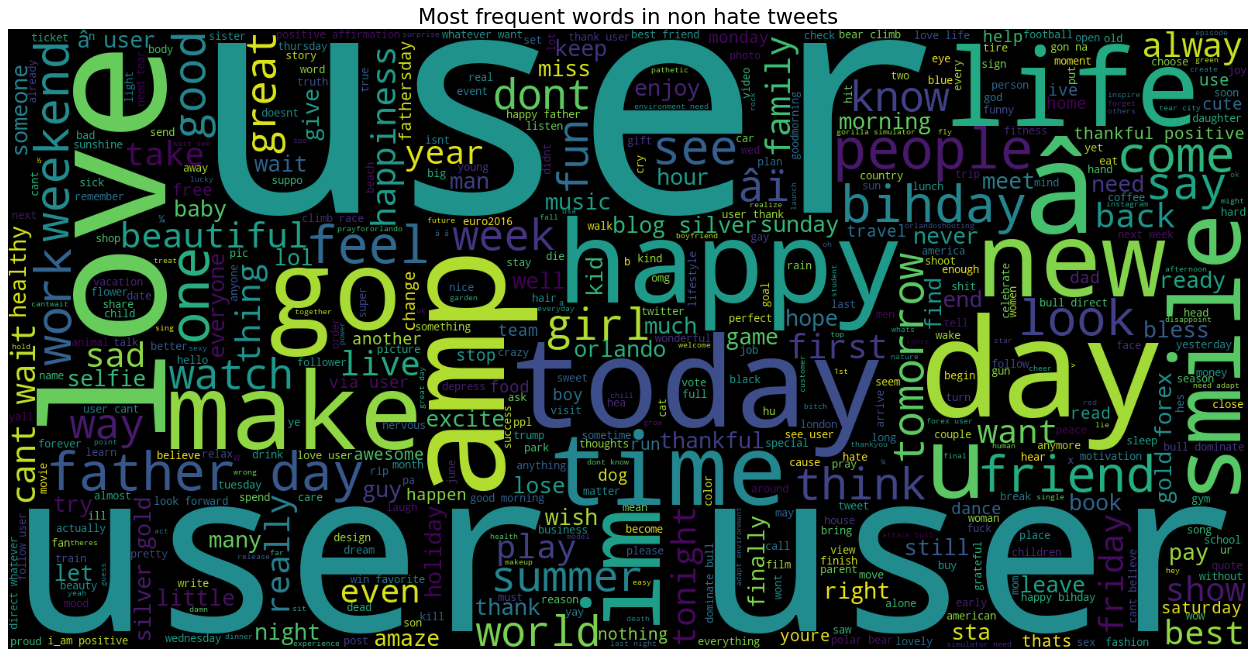

In [37]:
text = ' '.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor = 'None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 19)
plt.show()

In [18]:
neg_tweets = tweet_df[tweet_df.label == 1]
neg_tweets.head()

,id,label,tweet,labels
13,14,1,user cnn call michigan middle school build wal...,hate speech
14,15,1,comment australia opkillingbay seashepherd hel...,hate speech
17,18,1,retweet agree,hate speech
23,24,1,user user lumpy say prove lumpy,hate speech
34,35,1,unbelievable 21st century wed need something l...,hate speech


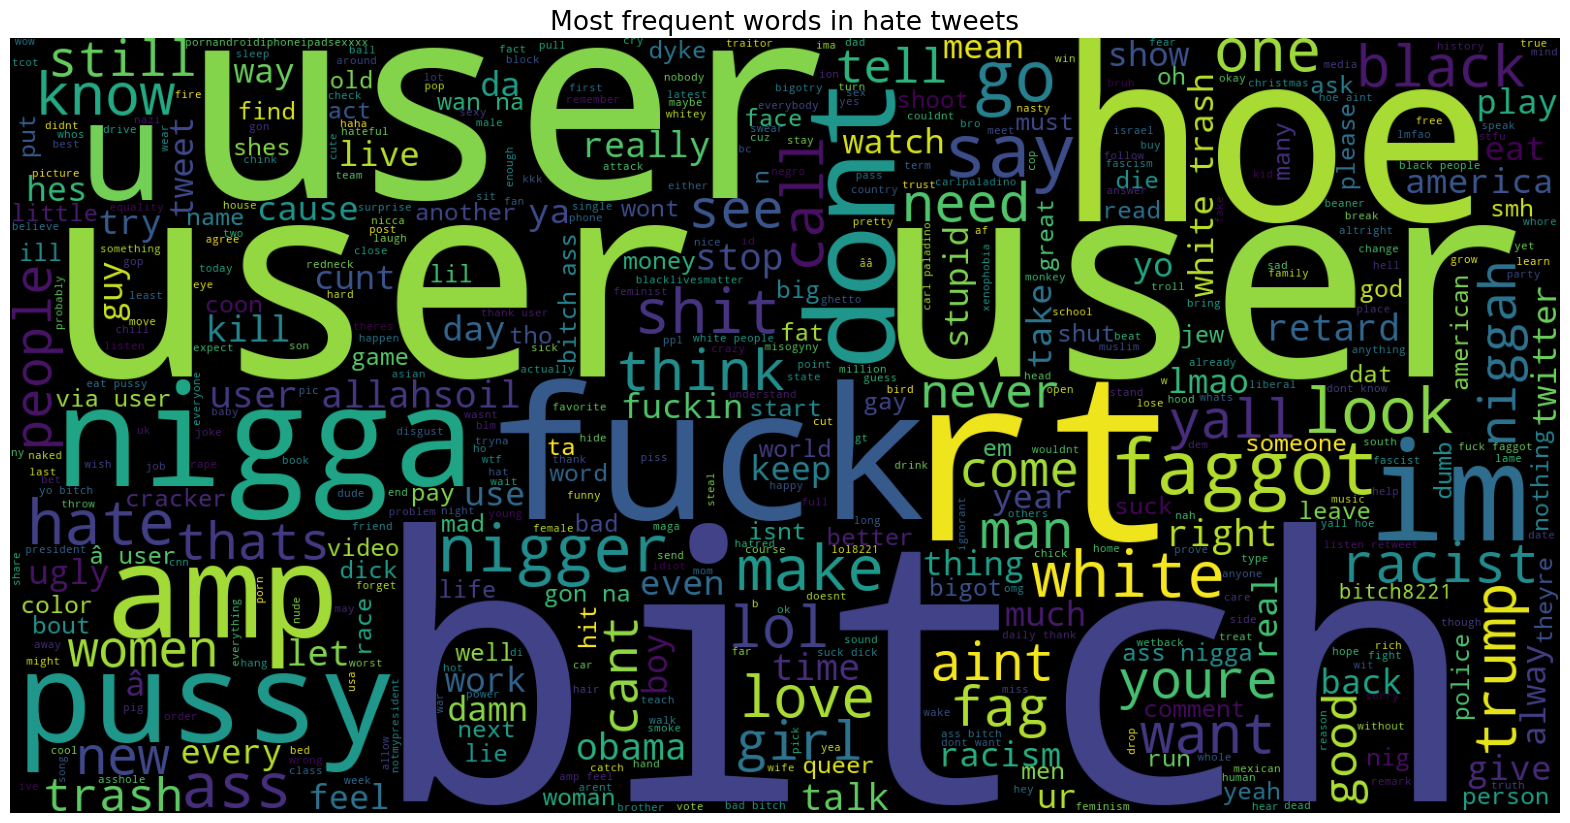

In [19]:
text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
plt.show()


In [40]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(tweet_df['tweet'])

In [41]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 227840

First 20 features: 
['0000001' '0000001 pollute' '00027' '00027 photooftheday' '001' '0035'
 '00h30' '00sexilexi00' '00sexilexi00 socass_' '01' '01 4995' '01 7900'
 '01 blog' '01 croatia' '01 may' '01 shopalyssas' '0115' '0115 8599968'
 '0161' '0161 manny']


# model building

In [22]:
X = tweet_df['tweet']
Y = tweet_df['labels']
X = vect.transform(X)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [24]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (22832, 227840)
Size of y_train: (22832,)
Size of x_test:  (9786, 227840)
Size of y_test:  (9786,)


In [42]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 90.31%


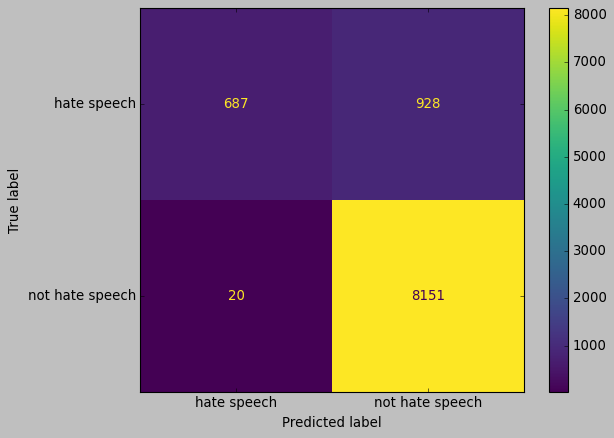

In [43]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [28]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [29]:
param_grid = {'C':[100,1.0], 'solver' :['newton-cg','lbfgs','sag']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 10)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.94
Best parameters:  {'C': 100, 'solver': 'sag'}


In [63]:
test_data='i k*ll you'
df=vect.transform([test_data]).toarray()
print(grid.predict(df))
y_pred=grid.predict(x_test)

['not hate speech']


In [44]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 93.94%


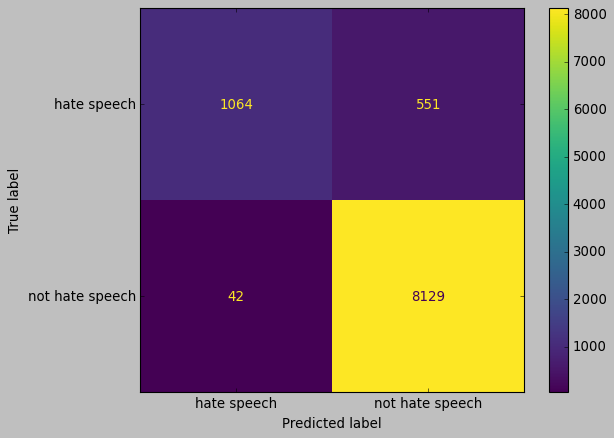

In [45]:
style.use('classic')
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()